# Homework 8: Advection and Diffusion

#### Objective:
In this homework, we will investigate the comparative magnitudes of advection and diffusion of heat in the ocean. For this exercise, we will rely on output from a model that we have compiled and run in class. If you have not already done so, you will need to compile and run the `global_with_exf` verification experiment according to the steps on the handout from Lecture 8-2.

#### Import Modules:
Begin by importing the modules to read in data, conduct calculations, and make plots.

In [52]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math

Define a path to your run directory where you will store data for this exercise.

In [53]:
run_folder = 'C:\\Users\\Blake Montgomery\\Desktop\\CS 185C\\Homeworks\\homework_8\\MITgcm\\verification\\global_with_exf\\run'

## Part 1: The Heat Equation
In the space below, write down the equation that describes the evolution of temperature in the ocean. Then, for each term in the equation, write one sentence to describe what the term means qualitatively.

### Change this cell to a markdown cell and 
### edit the contents to write the equation. 
### If you prefer, you can also write your equation on 
### paper, scan it, and turn it in on Canvas.

# answer: for the sake of time going to put in a screenshot from lecture:
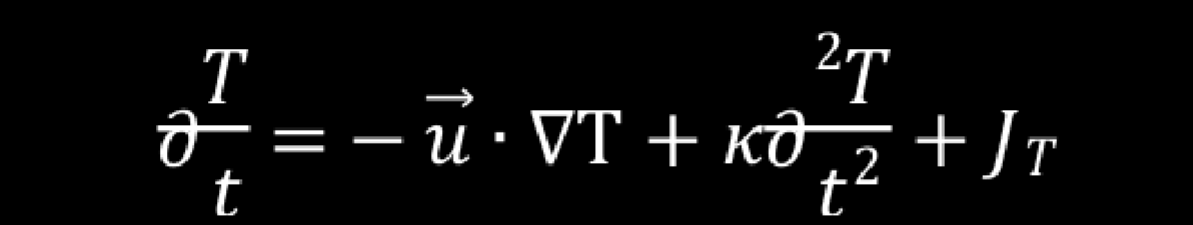

#### Change this cell to a markdown cell and 
#### write a sentence describing each term in the equation

# Asnwer:
## first term: LHS of equal sign, the change in temperature at any given location will be equal to...
## second term and on (RHS) of equal sign: advected temperature (change in temperature over time)
## third term: this is diffusion which is the movement of higher and lower temprature water
## remaining terms: factoring other heating quantatative values like solar radiation, sea ice formation, wind cooling, and many other values

## Part 2: Considering Temperature
In class, we wrote the temperature equation with the symbol $\Theta$. What does this term signify and why do we use it instead of temperature $T$?

# Change this cell to a markdown cell and 
# enter your answer here. 

### Answer: The reason we use this theta instead of T is because you also have to factor in Potential temperature, because the ocean is not a unified single temperature due to different depths having different temperatures, we must use the theta equation, PT is also not effected by dynamics so its easier to quantify and track accurately while also being easier

## Part 3: Read in the data
This section will leverage the `ADVx_TH`, `ADVy_TH`, `DFxE_TH` and `DFyE_TH` variables generated from the `global_with_exf`model. These files refer to the $x$- and $y$-components of advection and diffusion (vector quantities). The $x$-component is aligned roughly eastward and the $y$-component is aligned roughly northward near the equator. Read in the 4 advection and diffusion fields. The units of these fields are  $^{\circ}$C$\cdot$m$^3$/s - a transport of temperature with volume. The quantity can by converted to a heat flux (in units of $W$) by considering specific heat ($C_p$) and the density $\rho_w$ of seawater. It is not necessary to make this conversion in this homework.

In addition to the 4 fields above, also read in the fields `XC` and `YC` grids generated by the model in your run directory:

In [54]:
n_rows = 40
n_cols = 90
n_depth_levels = 15 # per the SIZE.h file

# if you ran you model according to the class directions,
# you should have these files to read in and no other
# changes are required in this cell

ADVx_TH_file = os.path.join(run_folder,'diags','ADVx_TH','ADVx_TH.0000000630.data')
ADVx_TH = np.fromfile(ADVx_TH_file, '>f4').reshape((n_depth_levels, n_rows, n_cols))

ADVy_TH_file = os.path.join(run_folder,'diags','ADVy_TH', 'ADVy_TH.0000000630.data')
ADVy_TH = np.fromfile(ADVy_TH_file, '>f4').reshape((n_depth_levels, n_rows, n_cols))

DFxE_TH_file = os.path.join(run_folder,'diags','DFxE_TH', 'DFxE_TH.0000000630.data')
DFxE_TH = np.fromfile(DFxE_TH_file, '>f4').reshape((n_depth_levels, n_rows, n_cols))

DFyE_TH_file = os.path.join(run_folder,'diags','DFyE_TH', 'DFyE_TH.0000000630.data')
DFyE_TH = np.fromfile(DFyE_TH_file, '>f4').reshape((n_depth_levels, n_rows, n_cols))

XC_file = os.path.join(run_folder,'XC.data')
XC = np.fromfile(XC_file, '>f4').reshape((n_rows, n_cols))

YC_file = os.path.join(run_folder,'YC.data')
YC = np.fromfile(YC_file, '>f4').reshape((n_rows, n_cols))

Subset the variables to the first depth level ($k=0$):

In [55]:
ADVx_TH = np.array(ADVx_TH[0,:,:])
ADVy_TH = np.array(ADVy_TH[0,:,:])
DFxE_TH = np.array(DFxE_TH[0,:,:])
DFyE_TH = np.array(DFyE_TH[0,:,:])

## Part 4: Plot of advection and diffusion
Next, plot the vector components of advection and diffusion in a 2x2 grid of plots. In creating your plot, be sure to do the following:
- Use the `vmin` and `vmax` values in the `pcolormesh` plotting command to control the minimum and maximum values of the plot. Each pair of plots ($x$- and $y$- components for advection, $x$- and $y$- components for diffusion) should use the same bounds. You color bounds should fit the data appropriately and the min and max values should match (-1*min = max). You may find the functions `np.min()` and `np.max()` helpful.
- Add a colorbar and use a divergent colormap, such as 'seismic' or something similar.
- Add labels to your axes and a title on each subplot

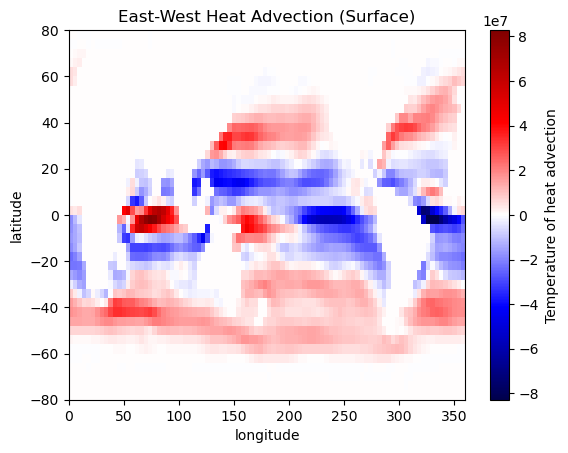

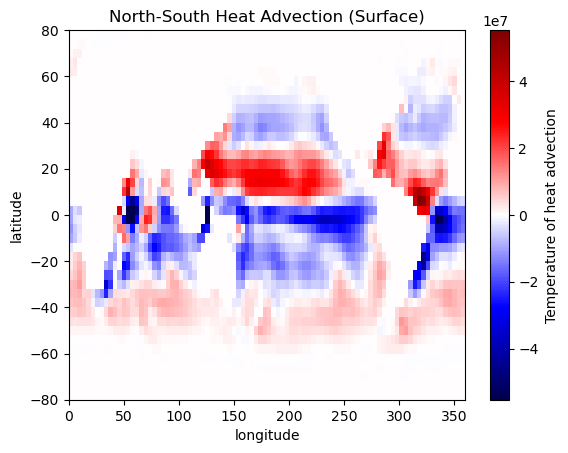

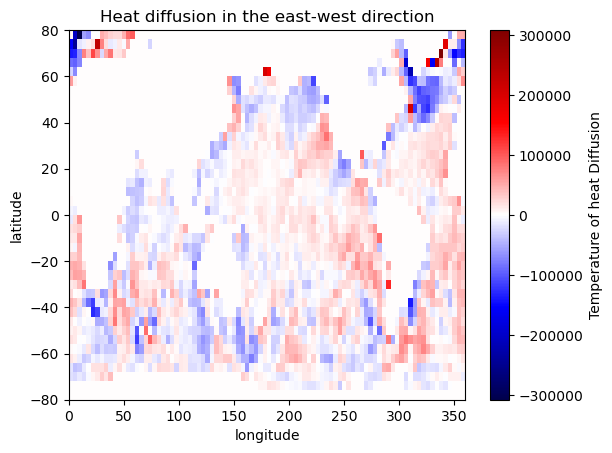

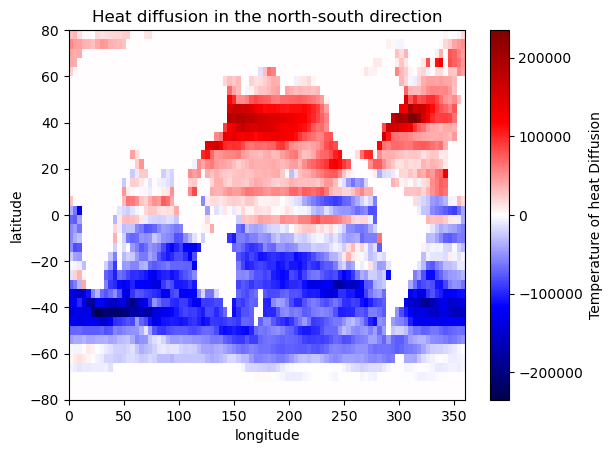

In [56]:
# make a figure object and axes
# use cartopy if you're feeling fancy
plt.figure()

# plot the advection field
# XC and YC are lat and Lon in this file

C = plt.pcolormesh(XC, YC, ADVx_TH, cmap='seismic', vmax= np.max(ADVx_TH), vmin= -np.max(ADVx_TH)) #plotting the depth of the serface with min and max values
color_bar = plt.colorbar(C) #value of the heat advection
color_bar.set_label('Temperature of heat advection')


# # plot a line at the rows and columns indicated (check box above for variables, they relate to the coordinates
# lon_subset = longitude[row, cols] # horizontal line coordinate
# lat_subset = latitude[row, cols]  # vertical aspect of te line
# plt.plot(lon_subset, lat_subset, 'k-') # plotting the line at the specified coordinates



# format the axes
plt.title('East-West Heat Advection (Surface)')
plt.ylabel("latitude")
plt.xlabel("longitude")
plt.show()
# END OF PLOT


plt.figure()

# plot the advection field
# XC and YC are lat and Lon in this file

C = plt.pcolormesh(XC, YC, ADVy_TH, cmap='seismic', vmax= np.max(ADVy_TH), vmin= -np.max(ADVy_TH)) #plotting the depth of the serface with min and max values
color_bar = plt.colorbar(C) #value of the heat advection
color_bar.set_label('Temperature of heat advection')


# # plot a line at the rows and columns indicated (check box above for variables, they relate to the coordinates
# lon_subset = longitude[row, cols] # horizontal line coordinate
# lat_subset = latitude[row, cols]  # vertical aspect of te line
# plt.plot(lon_subset, lat_subset, 'k-') # plotting the line at the specified coordinates



# format the axes
plt.title('North-South Heat Advection (Surface)')
plt.ylabel("latitude")
plt.xlabel("longitude")
plt.show()
# END OF PLOT

C = plt.pcolormesh(XC, YC, DFxE_TH, cmap='seismic', vmax= np.max(DFxE_TH), vmin= -np.max(DFxE_TH)) #plotting the depth of the serface with min and max values
color_bar = plt.colorbar(C) #value of the heat advection
color_bar.set_label('Temperature of heat Diffusion')


# # plot a line at the rows and columns indicated (check box above for variables, they relate to the coordinates
# lon_subset = longitude[row, cols] # horizontal line coordinate
# lat_subset = latitude[row, cols]  # vertical aspect of te line
# plt.plot(lon_subset, lat_subset, 'k-') # plotting the line at the specified coordinates



# format the axes
plt.title('Heat diffusion in the east-west direction')
plt.ylabel("latitude")
plt.xlabel("longitude")
plt.show()
# END OF PLOT

C = plt.pcolormesh(XC, YC, DFyE_TH, cmap='seismic', vmax= np.max(DFyE_TH), vmin= -np.max(DFyE_TH)) #plotting the depth of the serface with min and max values
color_bar = plt.colorbar(C) #value of the heat advection
color_bar.set_label('Temperature of heat Diffusion')


# # plot a line at the rows and columns indicated (check box above for variables, they relate to the coordinates
# lon_subset = longitude[row, cols] # horizontal line coordinate
# lat_subset = latitude[row, cols]  # vertical aspect of te line
# plt.plot(lon_subset, lat_subset, 'k-') # plotting the line at the specified coordinates



# format the axes
plt.title('Heat diffusion in the north-south direction')
plt.ylabel("latitude")
plt.xlabel("longitude")
plt.show()
# END OF PLOT





## Part 5: Plot Magnitudes
To compare the differences advection and diffusion, we first need to compute the magnitude. The magnitude of a vector quantity is given by

$$
|\textbf{v}| = \sqrt{v_x^2 + v_y^2}
$$

Apply this formula to the fields above to produce fields of 2D advection and diffusion at the surface of the ocean.

In [57]:
# take the square root of the last index of the array for the highest value, square it, add them, take sqrt()
# print(ADVx_TH)
mag_advection = np.sqrt((ADVx_TH  ** 2) + (ADVy_TH  ** 2))



mag_diffusion = np.sqrt(DFxE_TH ** 2 + (DFyE_TH ** 2))


Now, plot the magnitudes of advection and diffusion. Since we are now working with magnitude rather than directional values, you should use a sequential colormap rather than a divergent colormap.

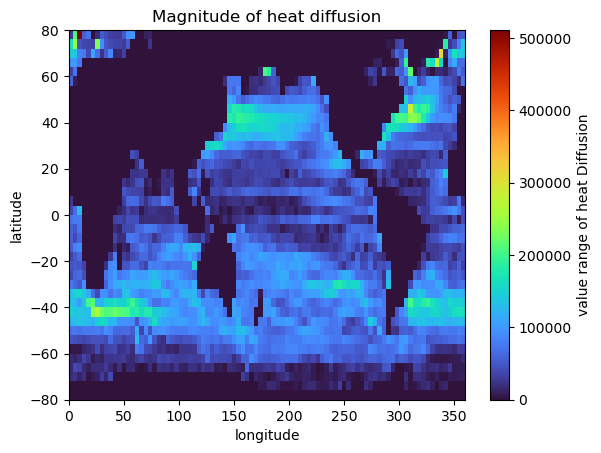

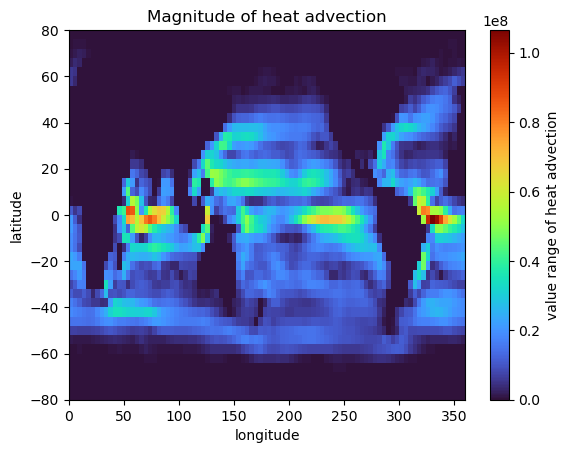

In [58]:

C = plt.pcolormesh(XC, YC, mag_diffusion, cmap='turbo', vmax= np.max(mag_diffusion), vmin= 0) #plotting the depth of the serface with min and max values
color_bar = plt.colorbar(C) #value of the heat advection
color_bar.set_label('value range of heat Diffusion')


# # plot a line at the rows and columns indicated (check box above for variables, they relate to the coordinates
# lon_subset = longitude[row, cols] # horizontal line coordinate
# lat_subset = latitude[row, cols]  # vertical aspect of te line
# plt.plot(lon_subset, lat_subset, 'k-') # plotting the line at the specified coordinates



# format the axes
plt.title('Magnitude of heat diffusion')
plt.ylabel("latitude")
plt.xlabel("longitude")
plt.show()
# END OF PLOT

C = plt.pcolormesh(XC, YC, mag_advection, cmap='turbo', vmax= np.max(mag_advection), vmin= 0) #plotting the depth of the serface with min and max values
color_bar = plt.colorbar(C) #value of the heat advection
color_bar.set_label('value range of heat advection')


# # plot a line at the rows and columns indicated (check box above for variables, they relate to the coordinates
# lon_subset = longitude[row, cols] # horizontal line coordinate
# lat_subset = latitude[row, cols]  # vertical aspect of te line
# plt.plot(lon_subset, lat_subset, 'k-') # plotting the line at the specified coordinates



# format the axes
plt.title('Magnitude of heat advection')
plt.ylabel("latitude")
plt.xlabel("longitude")
plt.show()
# END OF PLOT



What is the mean ratio between advection and diffusion of temperature? Do a quick calculation below to compute the ratio. Be sure not to include points on land where the magnitude of each is 0.

In [59]:
ratio = np.max(mag_advection) / np.max(mag_diffusion)
print(ratio)

208.44737


## Part 6: Advection vs Diffusion
In the calculation above, we see that one process is responsible for transporting much more heat than the other. Which process is larger?

Suppose you would like to simplify the ocean model to be less computationally expensive. One way that you could achieve this is by removing processes from the model which have less of an effect on the model behavior than others. Based on the above plots and calculations, which process would you remove? Specifically, in the equation written in part 1, which term would you cancel from the equation?

### Answer: this calculation proves that the advection is about 200* larger than the Diffusion,

### ways I would make this computationally less expensive I would remove the diffusion and just have Advection because it has way more data inside of it or I would use the thetha heat potential equation as it is less computationally expensive then the T equation as it doesnt factor in other heat dynamics